In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('emails.csv')

In [4]:
df.head()

text spam Unnamed: 2  \
0  Subject: naturally irresistible your corporate...    1        NaN   
1  Subject: the stock trading gunslinger  fanny i...    1        NaN   
2  Subject: unbelievable new homes made easy  im ...    1        NaN   
3  Subject: 4 color printing special  request add...    1        NaN   
4  Subject: do not have money , get software cds ...    1        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 100 Unnamed: 101 Unnamed: 102 Unnamed: 103  \
0        NaN  ...          NaN          NaN          NaN          NaN   
1        NaN  ...          NaN          NaN          NaN          NaN   
2        NaN  ...          NaN          NaN          NaN          NaN   
3        NaN  ...          NaN          NaN          NaN          NaN   
4        NaN  ...          NaN          NaN          NaN          NaN   

  Unnamed: 104 Unnamed: 105 Unnamed: 106 Unnamed: 107 Unnamed: 108  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 109  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 110 columns]

In [5]:
df['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5725    Subject: re : research and development charges...
5726    Subject: re : receipts from visit  jim ,  than...
5727    Subject: re : enron case study update  wow ! a...
5728    Subject: re : interest  david ,  please , call...
5729    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5730, dtype: object

In [6]:
df['spam']

0       1
1       1
2       1
3       1
4       1
       ..
5725    0
5726    0
5727    0
5728    0
5729    0
Name: spam, Length: 5730, dtype: object

In [7]:
eml = pd.concat([df['text'],df['spam']],axis=1)

In [8]:
eml.head()

text spam
0  Subject: naturally irresistible your corporate...    1
1  Subject: the stock trading gunslinger  fanny i...    1
2  Subject: unbelievable new homes made easy  im ...    1
3  Subject: 4 color printing special  request add...    1
4  Subject: do not have money , get software cds ...    1

In [9]:
eml['text length'] = eml['text'].apply(len)

In [10]:
eml.head()

text spam  text length
0  Subject: naturally irresistible your corporate...    1         1484
1  Subject: the stock trading gunslinger  fanny i...    1          598
2  Subject: unbelievable new homes made easy  im ...    1          448
3  Subject: 4 color printing special  request add...    1          500
4  Subject: do not have money , get software cds ...    1          235

In [11]:
eml['spam'].value_counts()

0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [12]:
g = eml[eml['spam']=='1'] 

In [15]:
y = eml[eml['spam']=='0'] 

In [18]:
email = pd.concat([g,y])

<AxesSubplot:xlabel='spam', ylabel='count'>

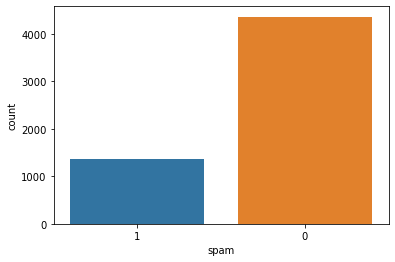

In [34]:
sns.countplot(data=email,x='spam')

<AxesSubplot:xlabel='spam', ylabel='text length'>

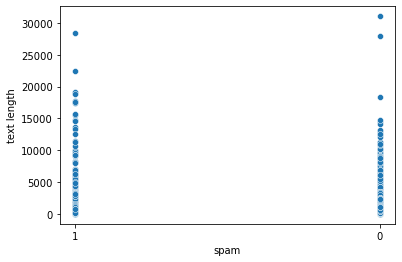

In [52]:
sns.scatterplot(data=email,x='spam',y='text length')

In [35]:
email['text'] = email['text'].apply(lambda x: x[9:])

In [36]:
X = email['text']
y= email['spam']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [38]:
X = cv.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [42]:
nb.fit(X_train,y_train)

MultinomialNB()

In [43]:
pred = nb.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1294   19]
 [   2  403]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.95      1.00      0.97       405

    accuracy                           0.99      1718
   macro avg       0.98      0.99      0.98      1718
weighted avg       0.99      0.99      0.99      1718

